## Clustering

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import pairwise_distances
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression,Ridge,Lasso
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set()
from mpl_toolkits.mplot3d import Axes3D
import time
from datetime import date

##  Data Overview

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#check for missing data
df.isnull().any().any()

False

In [7]:
#check for unreasonable data
df.applymap(np.isreal)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,True,True,True,True,True,True,True,True,True,True,True,True
1595,True,True,True,True,True,True,True,True,True,True,True,True
1596,True,True,True,True,True,True,True,True,True,True,True,True
1597,True,True,True,True,True,True,True,True,True,True,True,True


In [8]:
#set x and y
from sklearn.preprocessing import StandardScaler

X = df.iloc[:,0:11]
y = df['quality']

#stadardize data
X_scaled = StandardScaler().fit_transform(X)

# 1. K Means

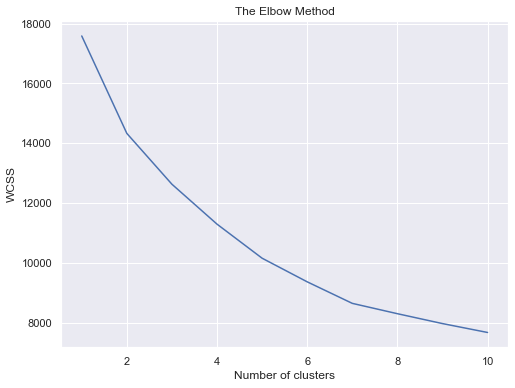

In [9]:
#try to find optimal k using the elbow method
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
#Applying kmeans to the dataset, set k=2
kmeans = KMeans(n_clusters = 2)
start_time = time.time()
clusters = kmeans.fit_predict(X_scaled)
today = date.today()
print("--- %s seconds ---" % (time.time() - start_time))
labels = kmeans.labels_

--- 0.06417298316955566 seconds ---


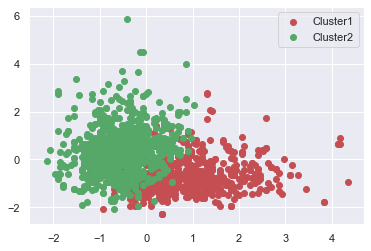

In [11]:
#2D plot
colors = 'rgbkcmy'
for i in np.unique(clusters):
    plt.scatter(X_scaled[clusters==i,0],
               X_scaled[clusters==i,1],
               color=colors[i], label='Cluster' + str(i+1))
plt.legend()

In [12]:
## column 'K-means Group' is the K-means cluster for each country
df1_clustered = df
df1_clustered['K-means Group'] = clusters
df1_clustered

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,K-means Group
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


Text(0.5, 0.92, 'K=2: Acidity, Sugar, Alcohol')

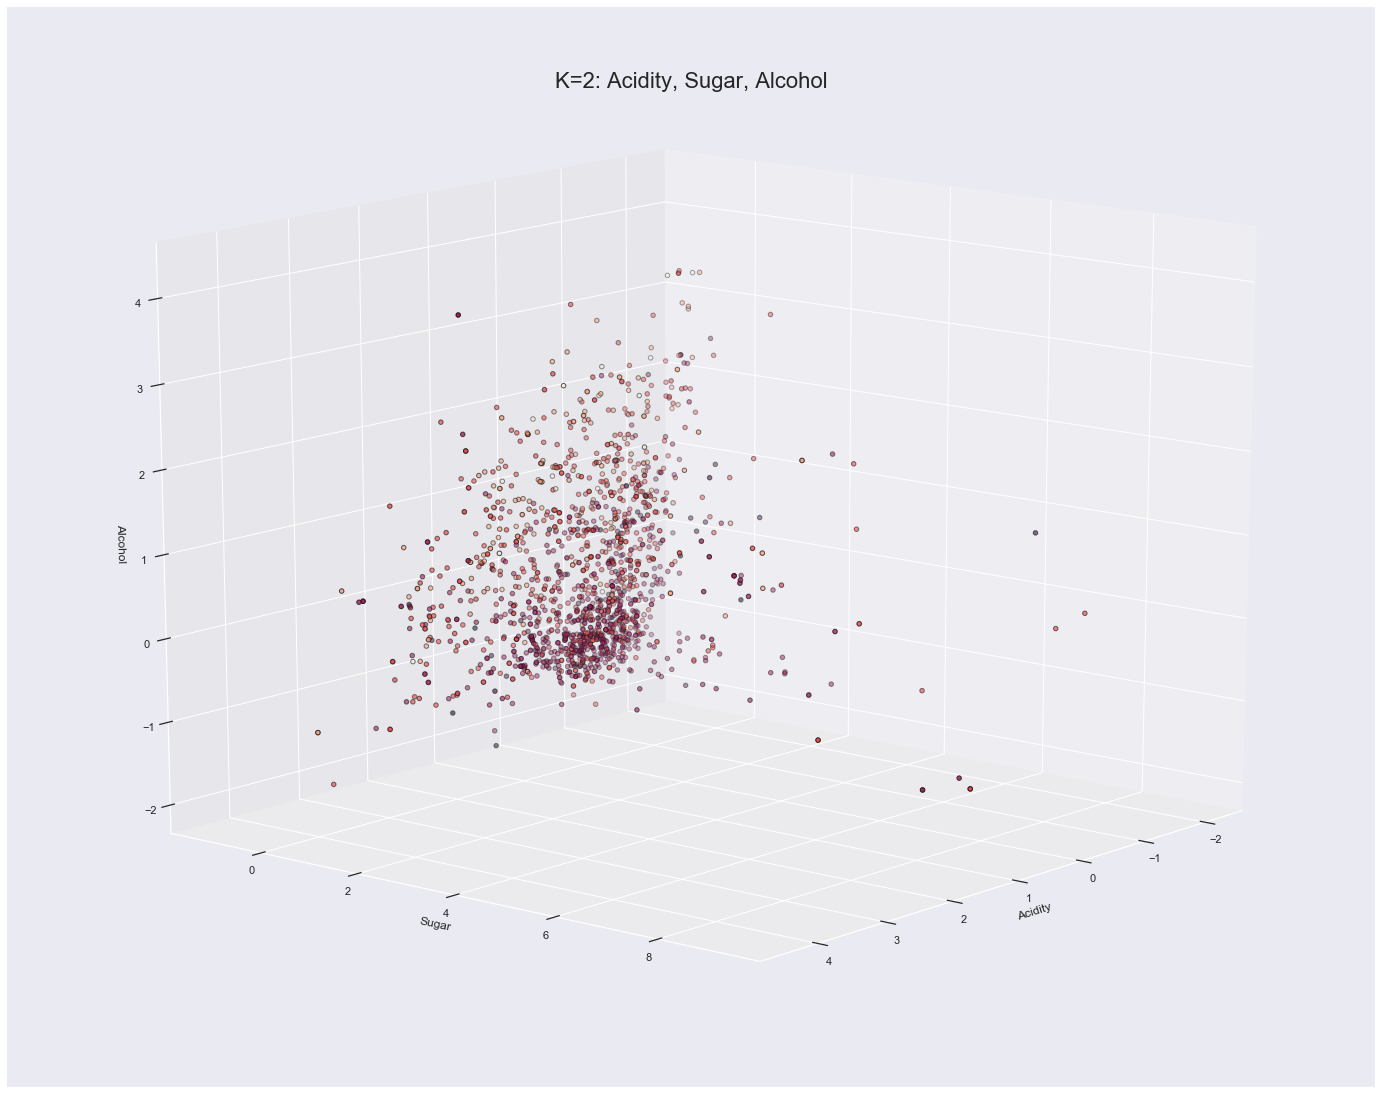

In [13]:
# Visualise the clusterds considerig fixed acidity, residual sugar, and alcohol
fig = plt.figure(figsize=(20, 15))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=15, azim=40)

ax.scatter(X_scaled[:,0], X_scaled[:,3], X_scaled[:,10],c=y, edgecolor='k')
ax.set_xlabel('Acidity')
ax.set_ylabel('Sugar')
ax.set_zlabel('Alcohol')
ax.set_title('K=2: Acidity, Sugar, Alcohol', size=22)

In [14]:
#evaluate model
from sklearn import metrics
from sklearn.metrics import pairwise_distances
metrics.silhouette_score(X_scaled, labels, metric='euclidean')

0.21372996335506225

In [15]:
kmeans.inertia_

14330.119811335493

# 2. K-means with PCA

In [16]:
pca = PCA(n_components=6)
pc_X = pca.fit_transform(X_scaled)
pc_columns = ['pc1','pc2','pc3','pc4','pc5','pc6']
print(pca.explained_variance_ratio_.sum())

0.8552471350764368


In [17]:
print(pca.explained_variance_ratio_)

[0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439]


In [18]:
#Applying kmeans to the dataset, set k=2
kmeans = KMeans(n_clusters = 2)
start_time = time.time()
clusters_PCA = kmeans.fit_predict(pc_X)
today = date.today()
print("--- %s seconds ---" % (time.time() - start_time))
labels = kmeans.labels_

--- 0.04857802391052246 seconds ---


In [19]:
## column 'K-means with PCA Group' is the K-means with PCA cluster for each country
df1_clustered['K-means With PCA Group'] = clusters_PCA
df1_clustered

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,K-means Group,K-means With PCA Group
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1,0


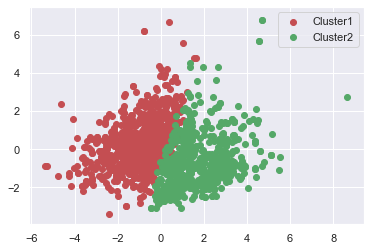

In [20]:
#2D plot
colors = 'rgbkcmy'
for i in np.unique(clusters_PCA):
    plt.scatter(pc_X[clusters_PCA==i,0],
               pc_X[clusters_PCA==i,1],
               color=colors[i], label='Cluster' + str(i+1))
plt.legend()

In [21]:
#evaluate model
metrics.silhouette_score(pc_X, labels, metric='euclidean')

0.24568699712695144

In [22]:
kmeans.inertia_

11788.848738519368

# 3. Hierarchical Clustering

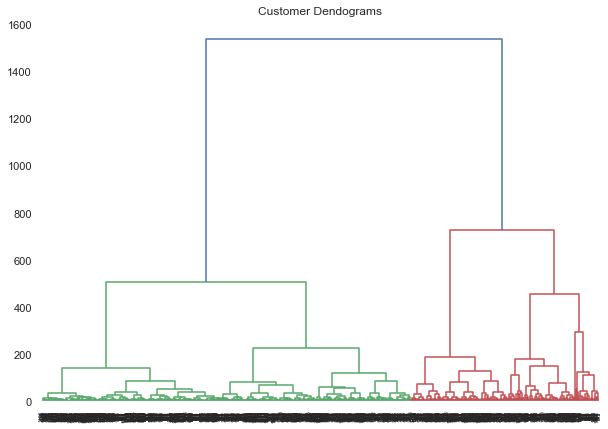

In [23]:
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(df, method='ward'))

In [24]:
for k in range(2,15):
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    cluster.fit_predict(X_scaled)  #print clusters
    print (k, metrics.calinski_harabaz_score(X_scaled,cluster.labels_))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.p

2 271.16897220284596
3 265.0698587685883
4 251.01968379617145
5 232.02166419445658


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.p

6 225.77101623423596
7 223.5171774491096
8 211.69933564557624
9 200.5063051410915


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.p

10 191.1568853901149
11 183.51240678436218
12 176.36177206130068
13 170.62753412636542
14 165.2962580775323


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)


In [25]:
ward = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
start_time = time.time()
cluster_ward = pd.Series(ward.fit_predict(X_scaled))
today = date.today()
print("--- %s seconds ---" % (time.time() - start_time))
labels = ward.labels_

--- 0.05466723442077637 seconds ---


In [26]:
## df1_clustered is our final data, colum 'Ward Group' is the hierarchical cluster for each country
df1_clustered['Ward Group'] = cluster_ward
df1_clustered

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,K-means Group,K-means With PCA Group,Ward Group
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,0,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1,0,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1,0,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,1,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1,0,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1,0,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1,0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1,0,0


In [27]:
#evaluate model
metrics.silhouette_score(X_scaled, labels, metric='euclidean')

0.1834016196435289